#Montar Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Comandos de Github

## Clonar el repositorio de Github a Colab

(Hacer solo una vez)
- Conectar Colab con Google Drive
- Crear una carpeta "Proyecto" en Google Drive "/content/drive/MyDrive/Proyecto"
- Cambiar la ruta a la carpeta Proyecto

In [ ]:
cd '/content/drive/MyDrive/Proyecto'

*     Clonar el repositorio en la carpeta Proyecto

In [ ]:
!git clone https://github.com/dapariciom/BEDU-procesamiento-de-datos-con-python-proyecto.git

## Actualizar cambios de Github a Colab

(Hacer cada vez que se requiera actualiza Colab con Github)
* Cambiar la ruta del proyecto para actualizar todos los archivos




In [ ]:
cd '/content/drive/MyDrive/Proyecto/BEDU-procesamiento-de-datos-con-python-proyecto'

* Actualizar archivos del repositorio de Github

In [ ]:
!git pull

# Proyecto Vacunación - 




**COVID-19 World Vaccination Progress**

**Daily and Total Vaccination for COVID-19 in the World**

https://www.kaggle.com/gpreda/covid-world-vaccination-progress


Características básicas del conjunto de datos
Los datos contienen la siguiente información
* Country- Este es el país para el que se proporciona la información de vacunación;
* Country ISO Code - Código ISO del país;
* Date - Fecha para la entrada de datos; para algunas de las fechas tenemos solo las vacunas diarias *, para otras, solo el total (acumulativo);
* Total number of vaccinations - Este es el número absoluto de inmunizaciones totales en el país;
* Total number of people vaccinated - Una persona, según el esquema de inmunización, recibirá una o más (normalmente 2) vacunas; en un momento determinado, el número de vacunaciones puede ser mayor que el número de personas;
* Total number of people fully vaccinated - Este es el número de personas que recibieron el conjunto completo de inmunización de acuerdo con el esquema de inmunización (normalmente 2); en un momento determinado, puede haber un cierto número de personas que recibieron una vacuna y otro número (menor) de personas que recibieron todas las vacunas del esquema;
* Daily vaccinations (raw) - Para una determinada entrada de datos, el número de vacunaciones para esa fecha / país;
* Daily vaccinations - Para una determinada entrada de datos, el número de vacunaciones para esa fecha / país;
* Total vaccinations per hundred - Relación (en porcentaje) entre el número de vacunaciones y la población total hasta la fecha en el país;
* Total number of people vaccinated per hundred - Relación (en porcentaje) entre la población completamente inmunizada y la población total hasta la fecha en el país;
* Total number of people fully vaccinated per hundred - Relación (en ppm) entre el número de vacunación y la población total para la fecha actual en el país;
* Daily vaccinations per million - Número total de vacunas utilizadas en el país (hasta la fecha);
* Source name - Fuente de la información (autoridad nacional, organización internacional, organización local, etc.);
* Source website - Sitio web de la fuente de información;

## Desarrollo del Proyecto

Instalar librerias

In [ ]:
pip install missingpy

Importar librerias

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from missingpy import  KNNImputer

Lectura de datos

In [12]:
csv_file = 'country_vaccinations.csv'
df = pd.read_csv(f'/content/drive/MyDrive/Proyecto/BEDU-procesamiento-de-datos-con-python-proyecto/{csv_file}', engine='python')
df2 = df.copy()
df

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Albania,ALB,2021-01-10,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
1,Albania,ALB,2021-01-11,NaN,NaN,NaN,NaN,64.0,NaN,NaN,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
2,Albania,ALB,2021-01-12,128.0,128.0,NaN,NaN,64.0,0.00,0.00,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
3,Albania,ALB,2021-01-13,188.0,188.0,NaN,60.0,63.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
4,Albania,ALB,2021-01-14,266.0,266.0,NaN,78.0,66.0,0.01,0.01,NaN,23.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5316,Zimbabwe,ZWE,2021-03-02,25077.0,25077.0,NaN,3621.0,3005.0,0.17,0.17,NaN,202.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1368309157...
5317,Zimbabwe,ZWE,2021-03-03,27970.0,27970.0,NaN,2893.0,2871.0,0.19,0.19,NaN,193.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1368309157...
5318,Zimbabwe,ZWE,2021-03-04,30658.0,30658.0,NaN,2688.0,2807.0,0.21,0.21,NaN,189.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1368309157...
5319,Zimbabwe,ZWE,2021-03-05,31325.0,31325.0,NaN,667.0,2678.0,0.21,0.21,NaN,180.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1368309157...


Explorar DataFrame

In [8]:
df.isna().sum(axis=0)

country                                   0
iso_code                                332
date                                      0
total_vaccinations                     1937
people_vaccinated                      2331
people_fully_vaccinated                3282
daily_vaccinations_raw                 2476
daily_vaccinations                      184
total_vaccinations_per_hundred         1937
people_vaccinated_per_hundred          2331
people_fully_vaccinated_per_hundred    3282
daily_vaccinations_per_million          184
vaccines                                  0
source_name                               6
source_website                            0
dtype: int64

In [9]:
df.dtypes

country                                 object
iso_code                                object
date                                    object
total_vaccinations                     float64
people_vaccinated                      float64
people_fully_vaccinated                float64
daily_vaccinations_raw                 float64
daily_vaccinations                     float64
total_vaccinations_per_hundred         float64
people_vaccinated_per_hundred          float64
people_fully_vaccinated_per_hundred    float64
daily_vaccinations_per_million         float64
vaccines                                object
source_name                             object
source_website                          object
dtype: object

Limpieza de datos

In [24]:
df = df.fillna(0)

In [25]:
columnas_int=["total_vaccinations","people_vaccinated","people_fully_vaccinated","daily_vaccinations_raw","daily_vaccinations"]
for columna in columnas_int:
  df[columna]=pd.to_numeric(df[columna],errors='coerce',downcast='integer')

In [26]:
df["total_vaccinations"]= pd.to_numeric(df["total_vaccinations"],errors='coerce',downcast='integer')

In [27]:
df_vaccinations = df.drop(columns= ["iso_code","source_name","source_website"])


In [28]:
df_vaccinations["date"] = pd.to_datetime(df_vaccinations["date"], format = '%Y-%m-%d')

Procedimiento

* ¿Cuál es el porcentaje total de personas vacunadas en el mundo?



In [29]:
world_population = 785156800
world_people_fully_vaccinated = df_vaccinations.groupby('country')['people_fully_vaccinated'].max().sum()

print(f'En el mundo se han vacunado completamente {round(world_people_fully_vaccinated):,} personas lo que equivale al {round(world_people_fully_vaccinated*100/world_population, 2)} % de la población mundial')

En el mundo se han vacunado completamente 66,694,460 personas lo que equivale al 8.49 % de la población mundial


* Cociente de personas vacunadas / personas completamente vacunadas

In [19]:
world_people_vaccinated = df_vaccinations.groupby('country')['people_vaccinated'].max().sum()
ratio = round(world_people_vaccinated/world_people_fully_vaccinated, 2)
print(f'El cociente de personas vacunadas / personas completamente vacunadas es {ratio}')
print(f'Lo que quiere decir que por cada {ratio} personas que han recibido al menos una vacuna existe 1 persona completamente vacunada')

El cociente de personas vacunadas / personas completamente vacunadas es 2.99
Lo que quiere decir que por cada 2.99 personas que han recibido al menos una vacuna existe 1 persona completamente vacunada


* Top 10 países que han vacunado mayor porcentaje de su población

country
Gibraltar               45.72
Israel                  42.94
Seychelles              25.04
United Arab Emirates    22.12
Bermuda                 13.88
Cayman Islands          11.80
Bahrain                 11.72
Isle of Man              9.98
Serbia                   9.11
United States            8.90
Name: people_fully_vaccinated_per_hundred, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


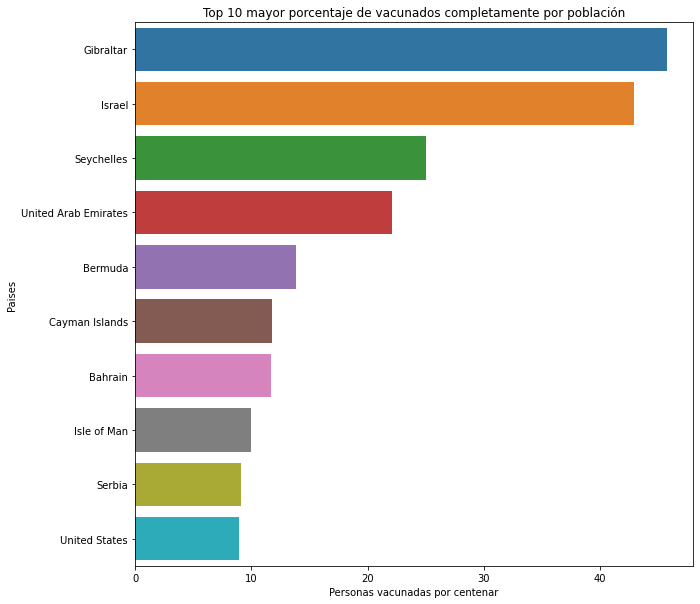

In [22]:
top_10_mayor_porcentaje = df_vaccinations.groupby('country')['people_fully_vaccinated_per_hundred'].max().sort_values(ascending=False).head(10)
print(top_10_mayor_porcentaje)

def daily_porcentajes_mayor_plot_bars(value):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_title('Top 10 mayor porcentaje de vacunados completamente por población')
    sns.barplot(value, value.index, ax=ax)
    ax.set(ylabel='Paises', xlabel='Personas vacunadas por centenar')

daily_porcentajes_mayor_plot_bars(top_10_mayor_porcentaje)

* Top 10 países que han vacunado menor porcentaje de su población

In [31]:
top_10_menor_porcentaje = df_vaccinations.groupby('country')['people_fully_vaccinated_per_hundred'].min().sort_values(ascending=True).head(10)
print(top_10_menor_porcentaje)

country
Albania             0.0
Philippines         0.0
Peru                0.0
Paraguay            0.0
Panama              0.0
Pakistan            0.0
Oman                0.0
Norway              0.0
Northern Ireland    0.0
Northern Cyprus     0.0
Name: people_fully_vaccinated_per_hundred, dtype: float64


* Top 10 países que han vacunado más personas

country
United States     57358849
United Kingdom    21796278
England           18491771
India             17168303
Brazil             7958939
Turkey             7509923
Russia             5082127
Israel             4929084
Germany            4915868
Chile              4047653
Name: people_vaccinated, dtype: int32


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


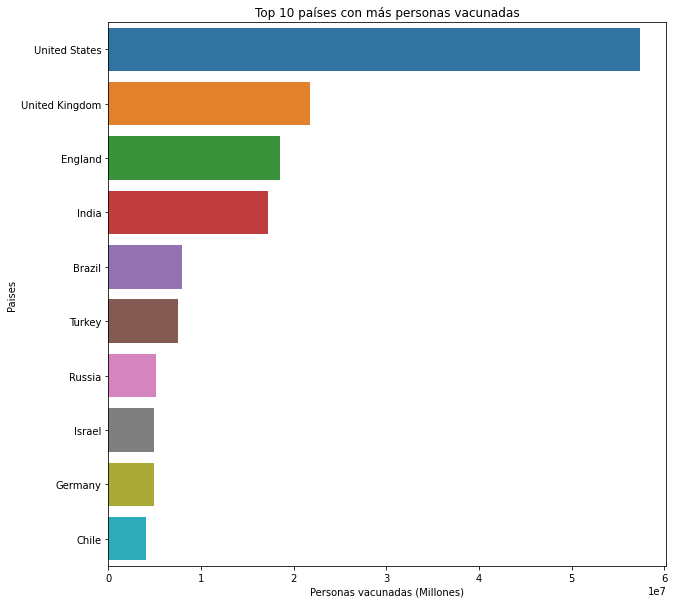

In [34]:
top_10_mas_personas_vacunadas = world_people_fully_vaccinated = df_vaccinations.groupby('country')['people_vaccinated'].max().sort_values(ascending=False).head(10)
print(top_10_mas_personas_vacunadas)

def daily_mas_personas_vacunadas_plot_bars(value):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_title('Top 10 países con más personas vacunadas')
    sns.barplot(value, value.index, ax=ax)
    ax.set(ylabel='Paises', xlabel='Personas vacunadas (Millones)')

daily_mas_personas_vacunadas_plot_bars(top_10_mas_personas_vacunadas)

* Top 10 países que han vacunado menos personas

In [37]:
top_10_menos_personas_vacunadas = world_people_fully_vaccinated = df_vaccinations.groupby('country')['people_vaccinated'].min().sort_values(ascending=True).head(10)
print(top_10_menos_personas_vacunadas)

country
Albania             0
Philippines         0
Paraguay            0
Panama              0
Pakistan            0
Oman                0
Northern Ireland    0
Northern Cyprus     0
New Zealand         0
Netherlands         0
Name: people_vaccinated, dtype: int32


* Top 10 de países que presentaron la mayor vacunacion por día

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


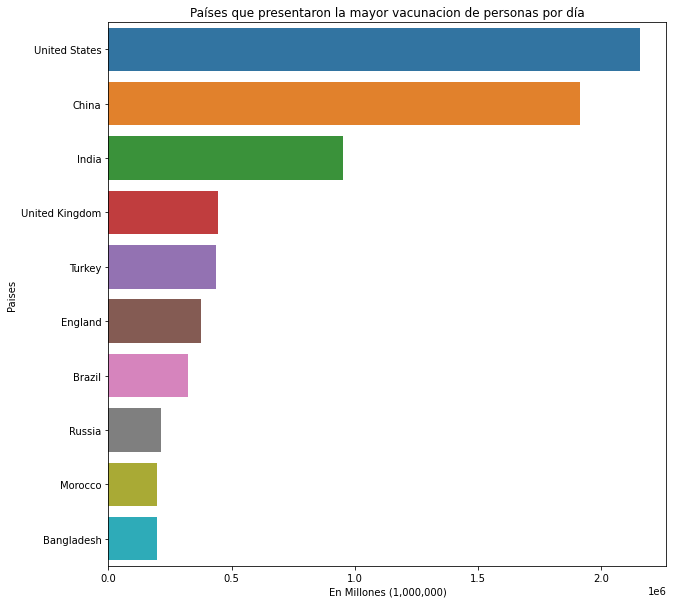

In [38]:
top_10_daily_vaccinations = df_vaccinations.groupby('country')['daily_vaccinations'].max().sort_values(ascending=False).head(10)

def daily_vaccinations_plot_bars(value):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_title('Países que presentaron la mayor vacunacion de personas por día')
    sns.barplot(value, value.index, ax=ax)
    ax.set(ylabel='Paises', xlabel='En Millones (1,000,000)')

daily_vaccinations_plot_bars(top_10_daily_vaccinations)





*   ¿Cuál es la vacuna más utilizada en el mundo?



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


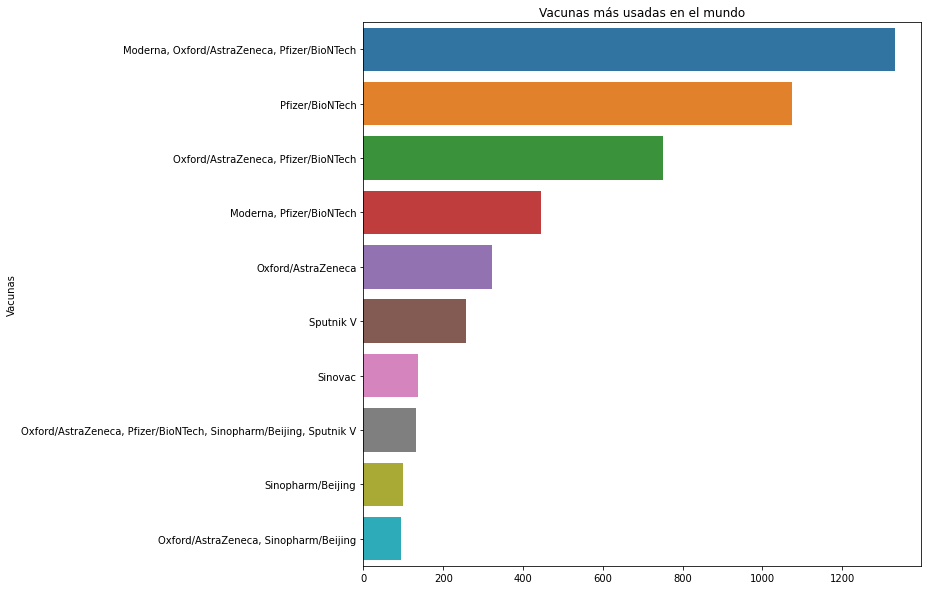

In [21]:
top_10_vaccines = df_vaccinations.groupby('vaccines').size().sort_values(ascending=False).head(10)

def top_vaccines_plot_bars(value):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_title('Vacunas más usadas en el mundo')
    sns.barplot(value, value.index, ax=ax)
    ax.set(ylabel='Vacunas')

top_vaccines_plot_bars(top_10_vaccines)

Filtramos datos para México

In [ ]:
df_mexico = df2[df2["country"] == "Mexico"]
df_mexico

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
3237,Mexico,MEX,2020-12-24,2924.0,2924.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech, Sputnik V",Secretary of Health,https://www.gob.mx/salud/prensa/098-con-esquem...
3238,Mexico,MEX,2020-12-25,NaN,NaN,NaN,NaN,1300.0,NaN,NaN,NaN,10.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sputnik V",Secretary of Health,https://www.gob.mx/salud/prensa/098-con-esquem...
3239,Mexico,MEX,2020-12-26,NaN,NaN,NaN,NaN,1300.0,NaN,NaN,NaN,10.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sputnik V",Secretary of Health,https://www.gob.mx/salud/prensa/098-con-esquem...
3240,Mexico,MEX,2020-12-27,6824.0,6824.0,NaN,NaN,1300.0,0.01,0.01,NaN,10.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sputnik V",Secretary of Health,https://www.gob.mx/salud/prensa/098-con-esquem...
3241,Mexico,MEX,2020-12-28,9579.0,9579.0,NaN,2755.0,1664.0,0.01,0.01,NaN,13.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sputnik V",Secretary of Health,https://www.gob.mx/salud/prensa/098-con-esquem...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3305,Mexico,MEX,2021-03-02,2583435.0,2012853.0,570582.0,56572.0,111754.0,2.00,1.56,0.44,867.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sputnik V",Secretary of Health,https://www.gob.mx/salud/prensa/098-con-esquem...
3306,Mexico,MEX,2021-03-03,2633580.0,2043941.0,589639.0,50145.0,104685.0,2.04,1.59,0.46,812.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sputnik V",Secretary of Health,https://www.gob.mx/salud/prensa/098-con-esquem...
3307,Mexico,MEX,2021-03-04,2676035.0,NaN,NaN,42455.0,83889.0,2.08,NaN,NaN,651.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sputnik V",Secretary of Health,https://www.gob.mx/salud/prensa/098-con-esquem...
3308,Mexico,MEX,2021-03-05,2731900.0,2128766.0,603134.0,55865.0,65838.0,2.12,1.65,0.47,511.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sputnik V",Secretary of Health,https://www.gob.mx/salud/prensa/098-con-esquem...


In [ ]:
df_mexico.isna().sum(axis=0)

country                                 0
iso_code                                0
date                                    0
total_vaccinations                      7
people_vaccinated                       9
people_fully_vaccinated                25
daily_vaccinations_raw                 11
daily_vaccinations                      1
total_vaccinations_per_hundred          7
people_vaccinated_per_hundred           9
people_fully_vaccinated_per_hundred    25
daily_vaccinations_per_million          1
vaccines                                0
source_name                             0
source_website                          0
dtype: int64

Imputación de variables faltantes para México

Eliminamos filas que tengan mas de 5 NaNs

In [ ]:
df_mexico_filtraNaNs=df_mexico.dropna(subset=["total_vaccinations","people_vaccinated","people_fully_vaccinated","daily_vaccinations_raw","daily_vaccinations","total_vaccinations_per_hundred","people_vaccinated_per_hundred","people_fully_vaccinated_per_hundred","daily_vaccinations_per_million"],thresh=5)
df_mexico_filtraNaNs


,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
3240,Mexico,MEX,2020-12-27,6824.0,6824.0,NaN,NaN,1300.0,0.01,0.01,NaN,10.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sputnik V",Secretary of Health,https://www.gob.mx/salud/prensa/098-con-esquem...
3241,Mexico,MEX,2020-12-28,9579.0,9579.0,NaN,2755.0,1664.0,0.01,0.01,NaN,13.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sputnik V",Secretary of Health,https://www.gob.mx/salud/prensa/098-con-esquem...
3242,Mexico,MEX,2020-12-29,18529.0,18529.0,NaN,8950.0,3121.0,0.01,0.01,NaN,24.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sputnik V",Secretary of Health,https://www.gob.mx/salud/prensa/098-con-esquem...
3243,Mexico,MEX,2020-12-30,24998.0,24998.0,NaN,6469.0,3679.0,0.02,0.02,NaN,29.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sputnik V",Secretary of Health,https://www.gob.mx/salud/prensa/098-con-esquem...
3248,Mexico,MEX,2021-01-04,43960.0,43960.0,NaN,NaN,4912.0,0.03,0.03,NaN,38.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sputnik V",Secretary of Health,https://www.gob.mx/salud/prensa/098-con-esquem...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3305,Mexico,MEX,2021-03-02,2583435.0,2012853.0,570582.0,56572.0,111754.0,2.00,1.56,0.44,867.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sputnik V",Secretary of Health,https://www.gob.mx/salud/prensa/098-con-esquem...
3306,Mexico,MEX,2021-03-03,2633580.0,2043941.0,589639.0,50145.0,104685.0,2.04,1.59,0.46,812.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sputnik V",Secretary of Health,https://www.gob.mx/salud/prensa/098-con-esquem...
3307,Mexico,MEX,2021-03-04,2676035.0,NaN,NaN,42455.0,83889.0,2.08,NaN,NaN,651.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sputnik V",Secretary of Health,https://www.gob.mx/salud/prensa/098-con-esquem...
3308,Mexico,MEX,2021-03-05,2731900.0,2128766.0,603134.0,55865.0,65838.0,2.12,1.65,0.47,511.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sputnik V",Secretary of Health,https://www.gob.mx/salud/prensa/098-con-esquem...


Subset con campos que continene valores faltantes

In [ ]:
dfNA= df_mexico_filtraNaNs[["total_vaccinations","people_vaccinated","people_fully_vaccinated","daily_vaccinations_raw","daily_vaccinations","total_vaccinations_per_hundred","people_vaccinated_per_hundred","people_fully_vaccinated_per_hundred","daily_vaccinations_per_million"]]

Cálculo de valores faltantes

In [ ]:
imp = KNNImputer(n_neighbors=4,weights="uniform")
X=imp.fit_transform(dfNA)

Asignamos valores calculados a df

In [ ]:
df_mexico_filtraNaNs[["total_vaccinations","people_vaccinated",
"people_fully_vaccinated","daily_vaccinations_raw","daily_vaccinations","total_vaccinations_per_hundred","people_vaccinated_per_hundred","people_fully_vaccinated_per_hundred","daily_vaccinations_per_million"]] = X

In [ ]:
df_mexico_filtraNaNs

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
3240,Mexico,MEX,2020-12-27,6824.0,6824.0,3539.75,5612.50,1300.0,0.01,0.01,0.0025,10.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sputnik V",Secretary of Health,https://www.gob.mx/salud/prensa/098-con-esquem...
3241,Mexico,MEX,2020-12-28,9579.0,9579.0,3539.75,2755.00,1664.0,0.01,0.01,0.0025,13.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sputnik V",Secretary of Health,https://www.gob.mx/salud/prensa/098-con-esquem...
3242,Mexico,MEX,2020-12-29,18529.0,18529.0,3539.75,8950.00,3121.0,0.01,0.01,0.0025,24.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sputnik V",Secretary of Health,https://www.gob.mx/salud/prensa/098-con-esquem...
3243,Mexico,MEX,2020-12-30,24998.0,24998.0,3539.75,6469.00,3679.0,0.02,0.02,0.0025,29.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sputnik V",Secretary of Health,https://www.gob.mx/salud/prensa/098-con-esquem...
3248,Mexico,MEX,2021-01-04,43960.0,43960.0,3539.75,5227.75,4912.0,0.03,0.03,0.0025,38.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sputnik V",Secretary of Health,https://www.gob.mx/salud/prensa/098-con-esquem...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3305,Mexico,MEX,2021-03-02,2583435.0,2012853.0,570582.00,56572.00,111754.0,2.00,1.56,0.4400,867.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sputnik V",Secretary of Health,https://www.gob.mx/salud/prensa/098-con-esquem...
3306,Mexico,MEX,2021-03-03,2633580.0,2043941.0,589639.00,50145.00,104685.0,2.04,1.59,0.4600,812.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sputnik V",Secretary of Health,https://www.gob.mx/salud/prensa/098-con-esquem...
3307,Mexico,MEX,2021-03-04,2676035.0,2086979.5,591700.50,42455.00,83889.0,2.08,1.62,0.4600,651.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sputnik V",Secretary of Health,https://www.gob.mx/salud/prensa/098-con-esquem...
3308,Mexico,MEX,2021-03-05,2731900.0,2128766.0,603134.00,55865.00,65838.0,2.12,1.65,0.4700,511.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sputnik V",Secretary of Health,https://www.gob.mx/salud/prensa/098-con-esquem...


In [ ]:
df_mexico_filtraNaNs.isna().sum(axis=0)

country                                0
iso_code                               0
date                                   0
total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                0
daily_vaccinations_raw                 0
daily_vaccinations                     0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
daily_vaccinations_per_million         0
vaccines                               0
source_name                            0
source_website                         0
dtype: int64

In [ ]:
diccionario_casting={"total_vaccinations":int,
                     "people_vaccinated":int,
                     "people_fully_vaccinated":int,
                     "daily_vaccinations_raw":int,
                     "daily_vaccinations":int
                     }
df_mexico_filtraNaNs = df_mexico_filtraNaNs.astype(diccionario_casting)

In [ ]:
df_mexico_filtraNaNs.dtypes

country                                 object
iso_code                                object
date                                    object
total_vaccinations                       int64
people_vaccinated                        int64
people_fully_vaccinated                  int64
daily_vaccinations_raw                   int64
daily_vaccinations                       int64
total_vaccinations_per_hundred         float64
people_vaccinated_per_hundred          float64
people_fully_vaccinated_per_hundred    float64
daily_vaccinations_per_million         float64
vaccines                                object
source_name                             object
source_website                          object
dtype: object



*   Personas vacunadas en México



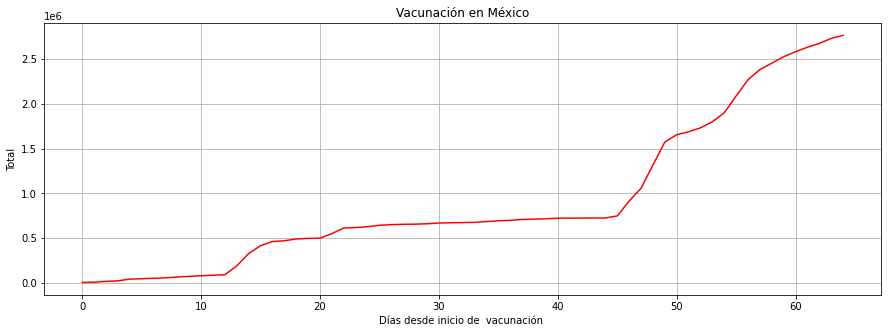

In [ ]:
dias = range(len(df_mexico_filtraNaNs["date"]))
vacunaciones = df_mexico_filtraNaNs["total_vaccinations"]
plt.figure(figsize=(15,5))
plt.title('Vacunación en México')
plt.xlabel('Días desde inicio de  vacunación ')
plt.ylabel('Total')
plt.grid(True)
plt.plot(dias,vacunaciones,'r-')
plt.show()



*   Porcentaje de población totalmente vacunada



In [ ]:
mexico_people_fully_vaccinated_percentage = df_mexico_filtraNaNs['people_fully_vaccinated_per_hundred'].max()
mexico_people_fully_vaccinated = df_mexico_filtraNaNs['people_fully_vaccinated'].max()
print(f'En México se han vacunado completamente {round(mexico_people_fully_vaccinated):,} personas lo que equivale al {mexico_people_fully_vaccinated_percentage} % de la población de México')

En México se han vacunado completamente 603,447 personas lo que equivale al 0.47 % de la población de México




*   Porcentaje de población parcialmente vacunada



In [ ]:
mexico_people_vaccinated_percentage = df_mexico_filtraNaNs['people_vaccinated_per_hundred'].max()
mexico_people_vaccinated = df_mexico_filtraNaNs['people_vaccinated'].max()
print(f'En México se han vacunado completamente {mexico_people_vaccinated:,} personas lo que equivale al {mexico_people_vaccinated_percentage} % de la población de México')

En México se han vacunado completamente 2,162,358 personas lo que equivale al 1.68 % de la población de México
